In [ ]:
!pip install matplotlib pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.3 MB 7.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.3 MB 7.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.3 MB 7.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.3 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.6/8.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 7.0 MB/s  0:00:01
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 7.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 7.0 MB/s eta 0:00:01
   -------------------

In [12]:
#!/bin/bash
!kaggle datasets download atharvasoundankar/global-cybersecurity-threats-2015-2024

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
License(s): CC0-1.0




  0%|          | 0.00/47.0k [00:00<?, ?B/s]
100%|██████████| 47.0k/47.0k [00:00<00:00, 13.4MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("global-cybersecurity-threats-2015-2024.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
path = "Global_Cybersecurity_Threats_2015-2024.csv"
# Load the dataset
df = pd.read_csv(path)
print(df.head())

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

Text(0, 0.5, 'Número de incidentes')

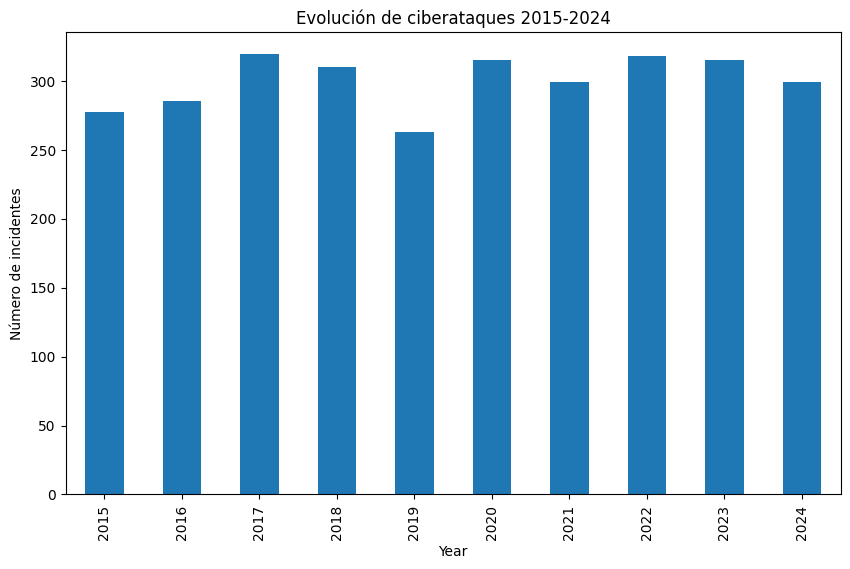

In [5]:
attacks_per_year = df.groupby('Year')['Attack Type'].count()
plt.figure(figsize=(10,6))
attacks_per_year.plot(kind='bar')
plt.title('Evolución de ciberataques 2015-2024')
plt.ylabel('Número de incidentes')

# Analisis exploratorio basico

In [6]:
import numpy as np
# Estructura básica
print(f"Muestras: {df.shape[0]}, Variables: {df.shape[1]}")
print("\nVariables:")
print(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum())

# Estrategia de imputación

print("\n=== VALORES NULOS ===")
null_analysis = df.isnull().sum()
missing_percent = (df.isnull().sum()/len(df))*100
null_summary = pd.DataFrame({'Nulos': null_analysis, 'Porcentaje': missing_percent})
print(null_summary)

Muestras: 3000, Variables: 10

Variables:
Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

Valores nulos:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

=== VALORES NULOS ===
            

In [7]:
# Análisis exploratorio para el contexto
print("=== ANÁLISIS DEL CONTEXTO ===")
print(f"Período cubierto: {df['Year'].min()} - {df['Year'].max()}")
print(f"Países cubiertos: {df['Country'].nunique()}")
print(f"Tipos de amenazas: {df['Security Vulnerability Type'].nunique()}")
print(f"Industrias afectadas: {df['Target Industry'].nunique()}")

# Tendencia temporal de incidentes
incidentes_por_año = df['Year'].value_counts().sort_index()
print("\nEvolución de incidentes:")
print(incidentes_por_año)

# Impacto económico total
impacto_total = df['Financial Loss (in Million $)'].sum()
print(f"\nImpacto financiero total: ${impacto_total:.2f}M")

=== ANÁLISIS DEL CONTEXTO ===
Período cubierto: 2015 - 2024
Países cubiertos: 10
Tipos de amenazas: 4
Industrias afectadas: 7

Evolución de incidentes:
Year
2015    277
2016    285
2017    319
2018    310
2019    263
2020    315
2021    299
2022    318
2023    315
2024    299
Name: count, dtype: int64

Impacto financiero total: $151478.91M


In [21]:
# Ejecutar en tu notebook para obtener el valor real
impacto_anual = df.groupby('Year')['Financial Loss (in Million $)'].sum()

print("=== CÁLCULO DE TENDENCIA INTERANUAL ===")
print(f"Impacto por año:")
for year, impact in impacto_anual.items():
    print(f"  {year}: ${impact:.2f}M")

# Crecimiento año a año
crecimiento_anual = impacto_anual.pct_change() * 100
print("\nCrecimiento interanual (%):")
for year, growth in crecimiento_anual.items():
    if not pd.isna(growth):
        print(f"  {year}: {growth:+.1f}%")

# Tendencia general del período
primer_año = impacto_anual.iloc[0]
ultimo_año = impacto_anual.iloc[-1]
años_totales = len(impacto_anual) - 1

# Fórmula de tasa de crecimiento anual compuesta (CAGR)
tendencia_interanual = ((ultimo_año / primer_año) ** (1 / años_totales) - 1) * 100

print(f"\n--- RESULTADO FINAL ---")
print(f"Impacto inicial ({impacto_anual.index[0]}): ${primer_año:.2f}M")
print(f"Impacto final ({impacto_anual.index[-1]}): ${ultimo_año:.2f}M")
print(f"Tendencia creciente interanual: {tendencia_interanual:.1f}%")

=== CÁLCULO DE TENDENCIA INTERANUAL ===
Impacto por año:
  2015: $14510.21M
  2016: $13947.26M
  2017: $16261.68M
  2018: $14720.48M
  2019: $13134.69M
  2020: $15767.95M
  2021: $15873.41M
  2022: $15870.86M
  2023: $15958.08M
  2024: $15434.29M

Crecimiento interanual (%):
  2016: -3.9%
  2017: +16.6%
  2018: -9.5%
  2019: -10.8%
  2020: +20.0%
  2021: +0.7%
  2022: -0.0%
  2023: +0.5%
  2024: -3.3%

--- RESULTADO FINAL ---
Impacto inicial (2015): $14510.21M
Impacto final (2024): $15434.29M
Tendencia creciente interanual: 0.7%


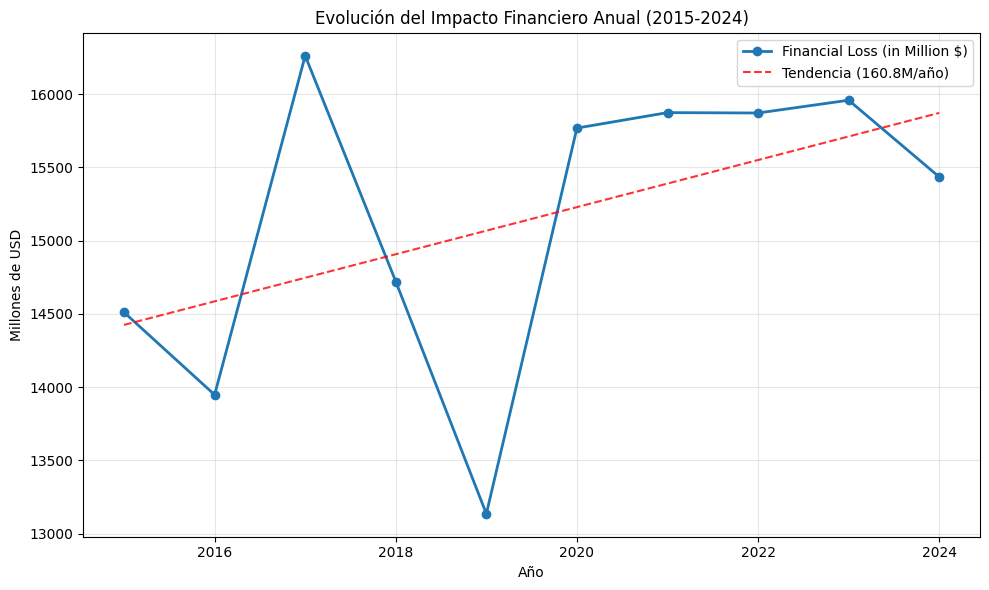

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
impacto_anual.plot(marker='o', linewidth=2)
plt.title('Evolución del Impacto Financiero Anual (2015-2024)')
plt.ylabel('Millones de USD')
plt.xlabel('Año')
plt.grid(True, alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(impacto_anual.index, impacto_anual.values, 1)
p = np.poly1d(z)
plt.plot(impacto_anual.index, p(impacto_anual.index), "r--", alpha=0.8, label=f'Tendencia ({z[0]:.1f}M/año)')

plt.legend()
plt.tight_layout()
plt.show()

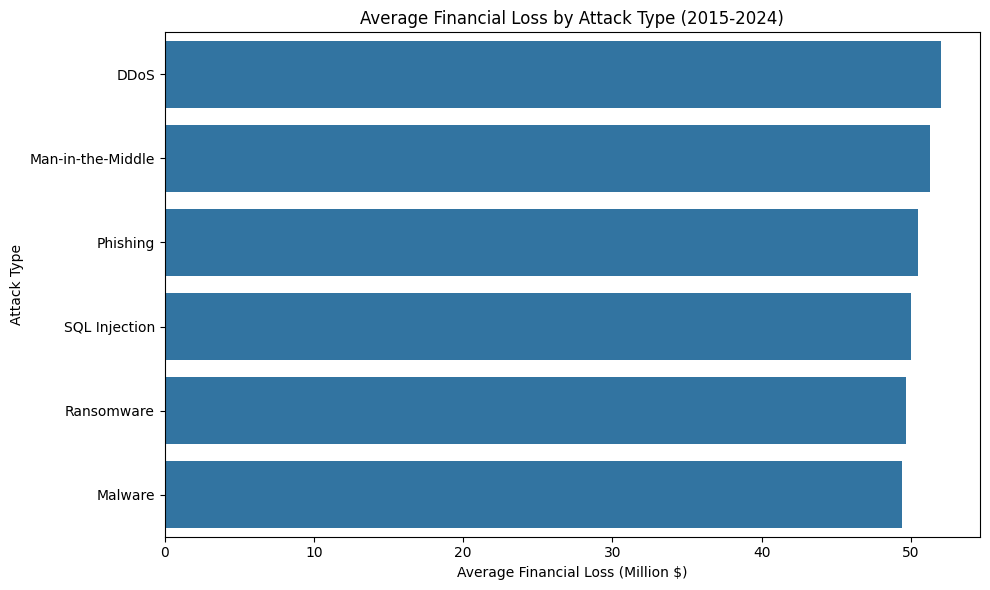

In [11]:
import seaborn as sns
# Financial loss by attack type
loss_by_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)

# Plot: Average Financial Loss by Attack Type
plt.figure(figsize=(10, 6))
sns.barplot(x=loss_by_attack.values, y=loss_by_attack.index)
plt.title('Average Financial Loss by Attack Type (2015-2024)')
plt.xlabel('Average Financial Loss (Million $)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

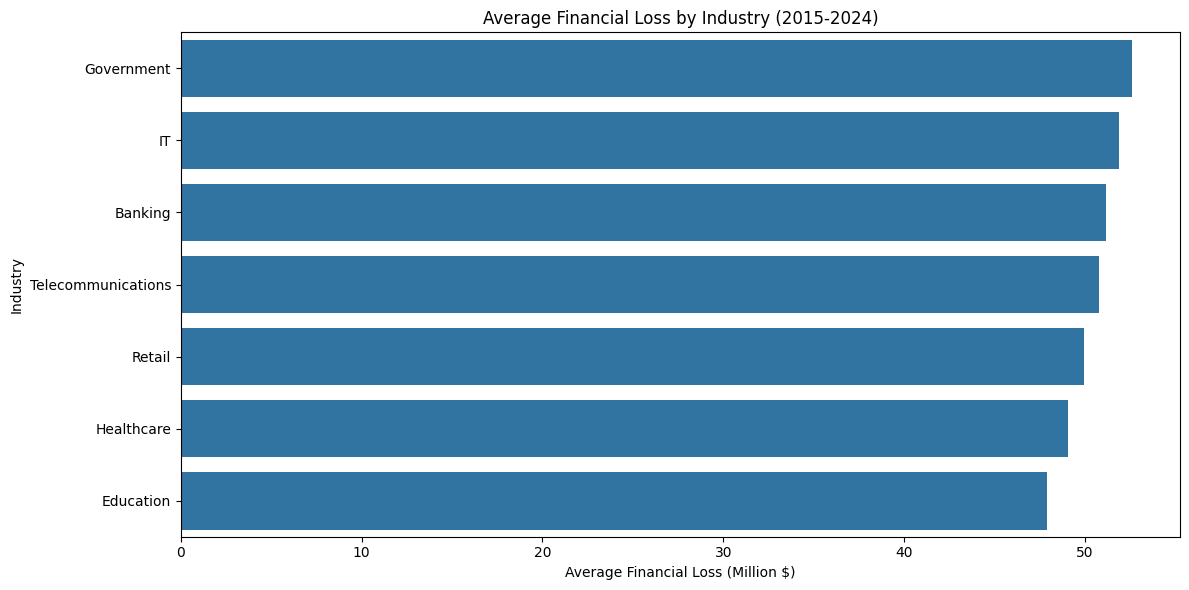

In [12]:
# Financial loss by industry
loss_by_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)

# Plot: Average Financial Loss by Industry
plt.figure(figsize=(12, 6))
sns.barplot(x=loss_by_industry.values, y=loss_by_industry.index)
plt.title('Average Financial Loss by Industry (2015-2024)')
plt.xlabel('Average Financial Loss (Million $)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

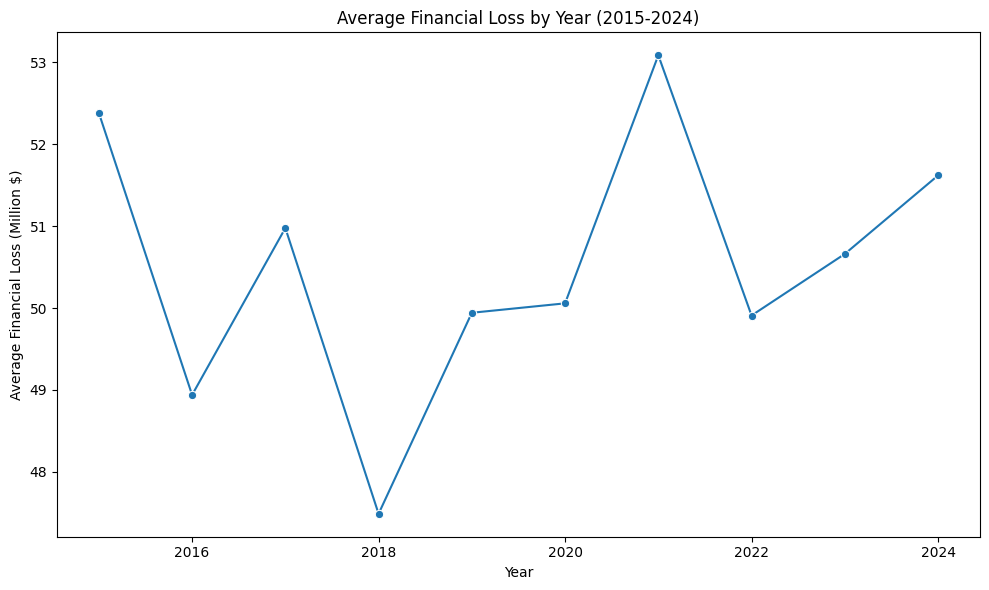

In [13]:
# Average financial loss by year
loss_by_year = df.groupby('Year')['Financial Loss (in Million $)'].mean()

# Plot: Average Financial Loss by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x=loss_by_year.index, y=loss_by_year.values, marker='o')
plt.title('Average Financial Loss by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Financial Loss (Million $)')
plt.tight_layout()
plt.show()

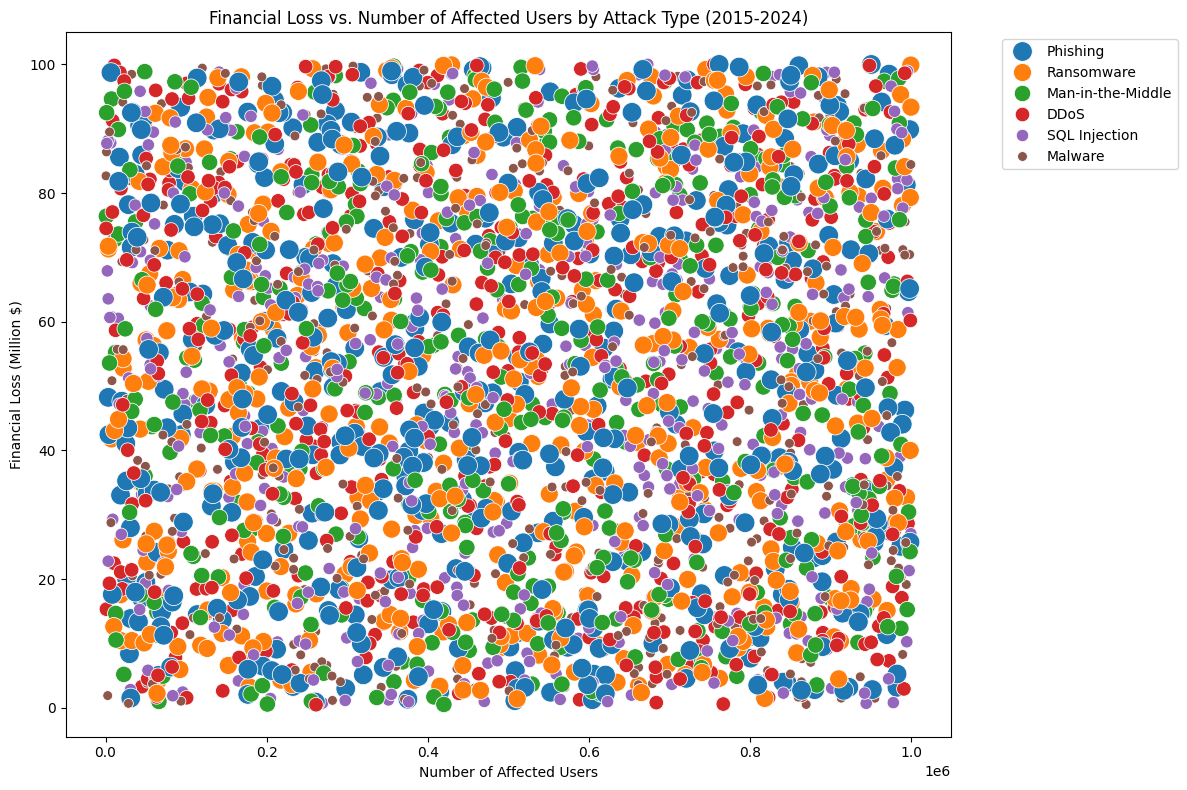

In [15]:
# Scatter Plot: Financial Loss vs. Number of Affected Users by Attack Type ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)', hue='Attack Type', size='Attack Type', sizes=(50, 200))
plt.title('Financial Loss vs. Number of Affected Users by Attack Type (2015-2024)')
plt.xlabel('Number of Affected Users')
plt.ylabel('Financial Loss (Million $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

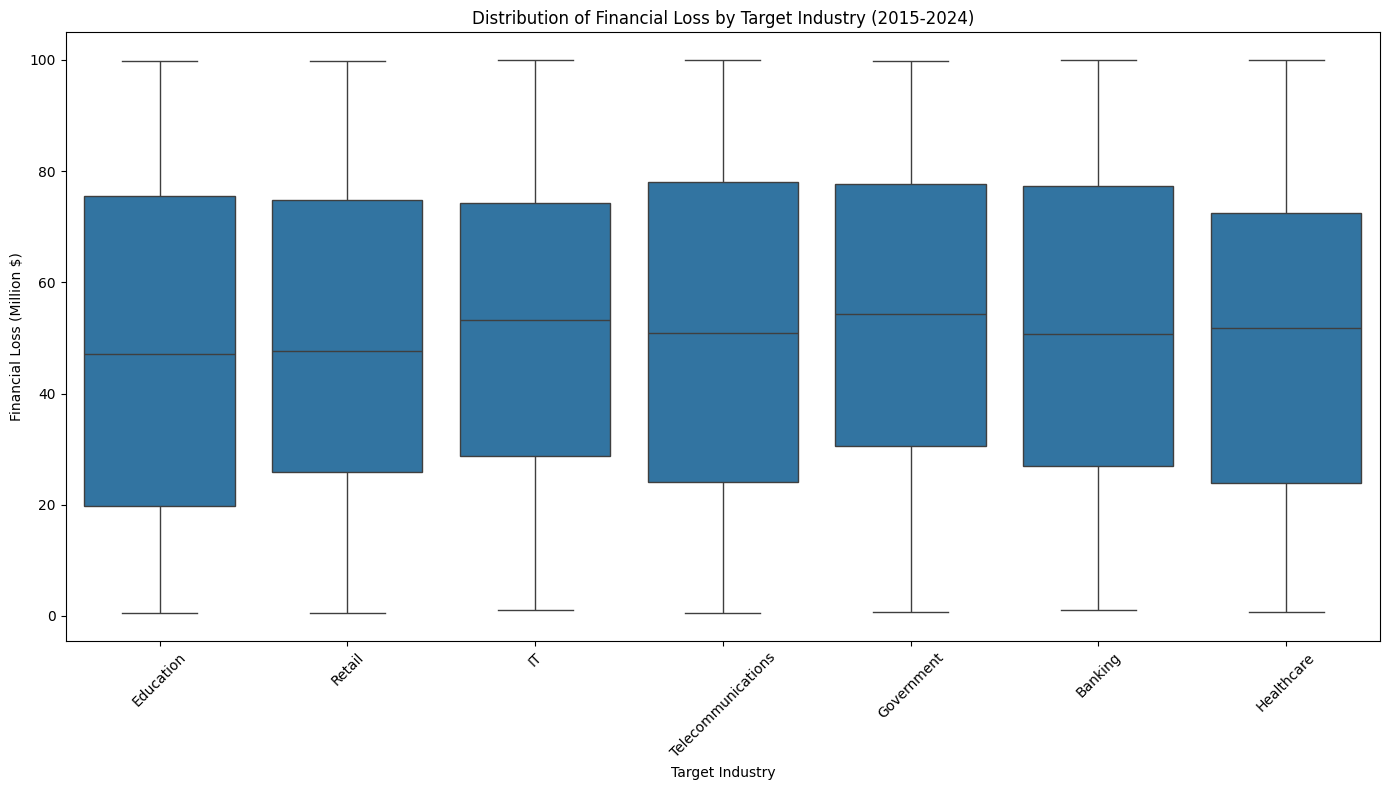

In [16]:
# Box Plot: Financial Loss by Target Industry ---
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Target Industry', y='Financial Loss (in Million $)')
plt.title('Distribution of Financial Loss by Target Industry (2015-2024)')
plt.xlabel('Target Industry')
plt.ylabel('Financial Loss (Million $)')
plt.xticks(rotation=45)
plt.tight_layout()

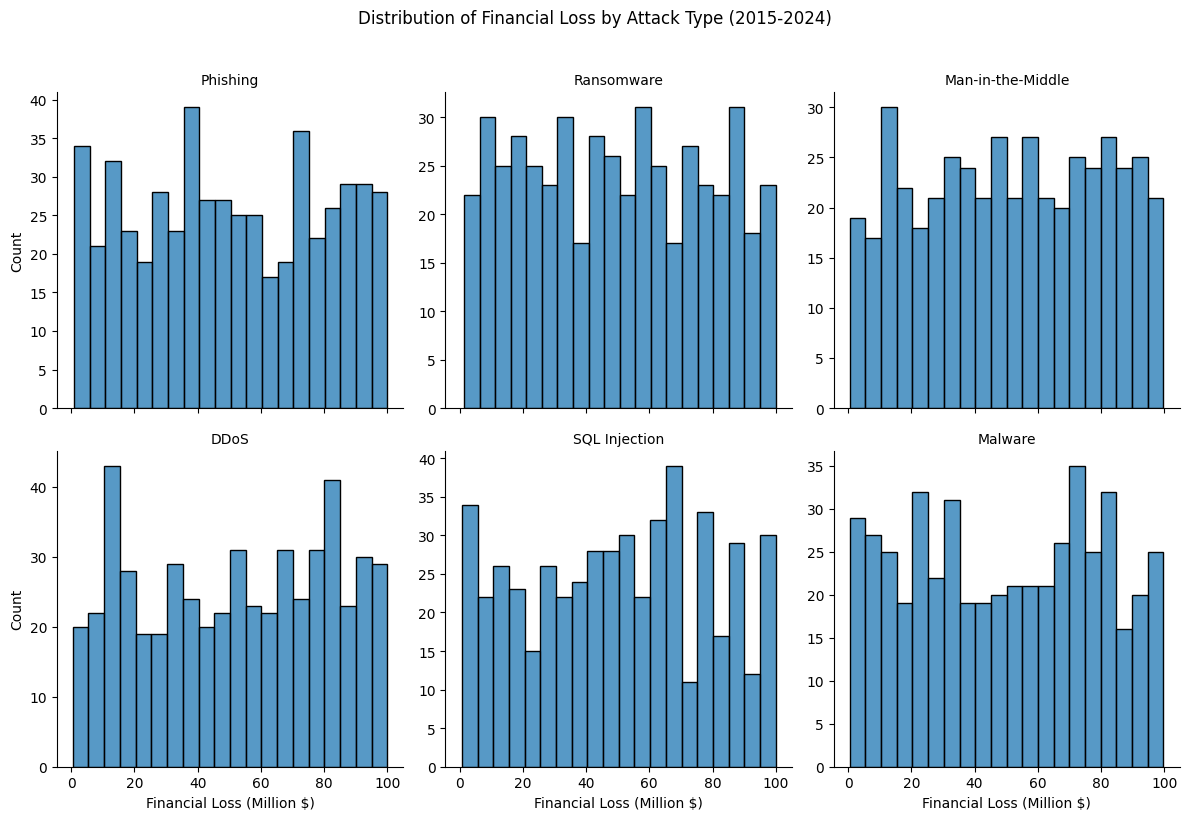

In [17]:
#  Facet Grid: Financial Loss by Year and Attack Type ---
g = sns.FacetGrid(df, col='Attack Type', col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'Financial Loss (in Million $)', bins=20)
g.set_titles('{col_name}')
g.set_xlabels('Financial Loss (Million $)')
g.set_ylabels('Count')
plt.suptitle('Distribution of Financial Loss by Attack Type (2015-2024)', y=1.02)
plt.tight_layout()
plt.show()

In [18]:
# Line Plot: Average Financial Loss by Attack Source Over Years ---
loss_by_source_year = df.groupby(['Year', 'Attack Source'])['Financial Loss (in Million $)'].mean().unstack()

<Figure size 1200x800 with 0 Axes>

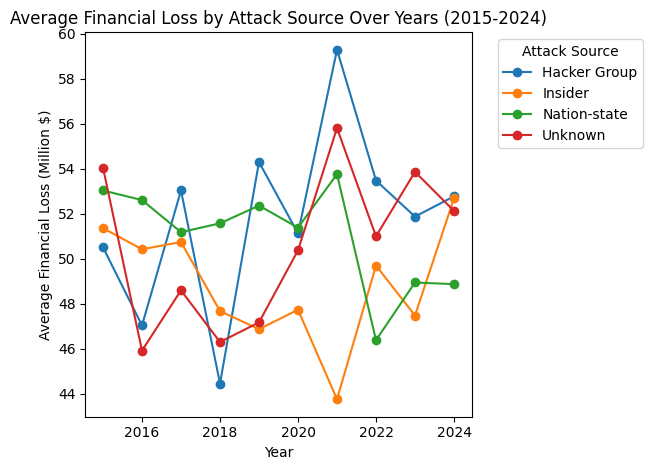

In [19]:
# Plot: Line Plot
plt.figure(figsize=(12, 8))
loss_by_source_year.plot(kind='line', marker='o')
plt.title('Average Financial Loss by Attack Source Over Years (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Financial Loss (Million $)')
plt.legend(title='Attack Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [24]:
# Convertir variables categóricas a numéricas para análisis de correlación
from sklearn.preprocessing import LabelEncoder

# Análisis de correlación ampliado
categorical_vars = ['Security Vulnerability Type', 'Attack Source', 'Target Industry', 'Country', 'Defense Mechanism Used']

plt.figure(figsize=(15, 10))
correlation_results = []

for var in categorical_vars:
    # Codificar temporalmente para correlación
    le = LabelEncoder()
    encoded_var = le.fit_transform(df[var].astype(str))
    
    # Calcular correlación con pérdida financiera
    correlation = np.corrcoef(encoded_var, df['Financial Loss (in Million $)'])[0,1]
    correlation_results.append((var, correlation))
    
    print(f"Correlación {var} vs Pérdida Financiera: {correlation:.3f}")

# Ordenar por correlación absoluta
correlation_results.sort(key=lambda x: abs(x[1]), reverse=True)
print("\nVariables más correlacionadas:")
for var, corr in correlation_results[:5]:
    print(f"  {var}: {corr:.3f}")

Correlación Security Vulnerability Type vs Pérdida Financiera: -0.005
Correlación Attack Source vs Pérdida Financiera: -0.004
Correlación Target Industry vs Pérdida Financiera: 0.005
Correlación Country vs Pérdida Financiera: 0.001
Correlación Defense Mechanism Used vs Pérdida Financiera: -0.011

Variables más correlacionadas:
  Defense Mechanism Used: -0.011
  Target Industry: 0.005
  Security Vulnerability Type: -0.005
  Attack Source: -0.004
  Country: 0.001


<Figure size 1500x1000 with 0 Axes>

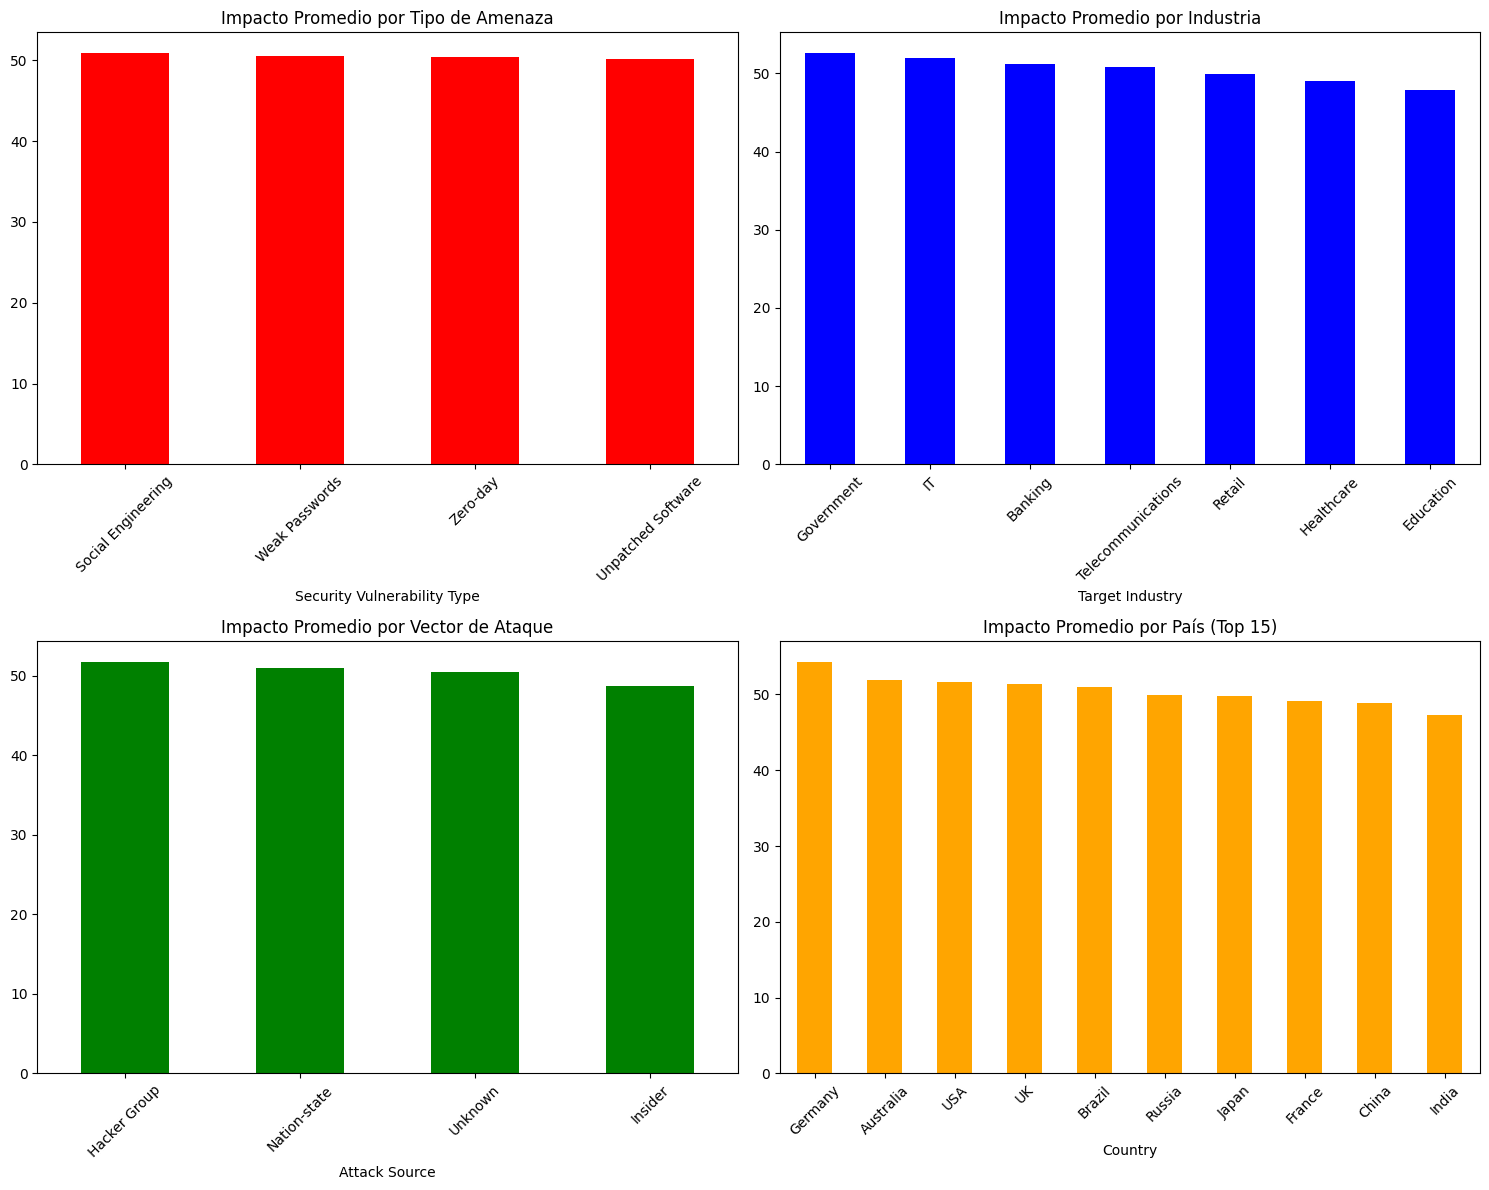

In [26]:
# Análisis de pérdida promedio por categorías
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Por tipo de amenaza
threat_impact = df.groupby('Security Vulnerability Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
threat_impact.head(10).plot(kind='bar', ax=axes[0,0], color='red')
axes[0,0].set_title('Impacto Promedio por Tipo de Amenaza')
axes[0,0].tick_params(axis='x', rotation=45)

# Por industria
industry_impact = df.groupby('Target Industry')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
industry_impact.plot(kind='bar', ax=axes[0,1], color='blue')
axes[0,1].set_title('Impacto Promedio por Industria')
axes[0,1].tick_params(axis='x', rotation=45)

# Por vector de ataque
vector_impact = df.groupby('Attack Source')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
vector_impact.head(8).plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title('Impacto Promedio por Vector de Ataque')
axes[1,0].tick_params(axis='x', rotation=45)

# Por país (top 15)
country_impact = df.groupby('Country')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
country_impact.head(15).plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Impacto Promedio por País (Top 15)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== ANÁLISIS DE INTERACCIONES ===
Interacción Tipo de Amenaza vs Tiempo de Respuesta:
                             Financial Loss (in Million $)  \
Security Vulnerability Type                                  
Social Engineering                               50.905676   
Weak Passwords                                   50.519726   
Zero-day                                         50.380306   
Unpatched Software                               50.168604   

                             Incident Resolution Time (in Hours)  
Security Vulnerability Type                                       
Social Engineering                                     36.459170  
Weak Passwords                                         35.623288  
Zero-day                                               35.963057  
Unpatched Software                                     37.882114  


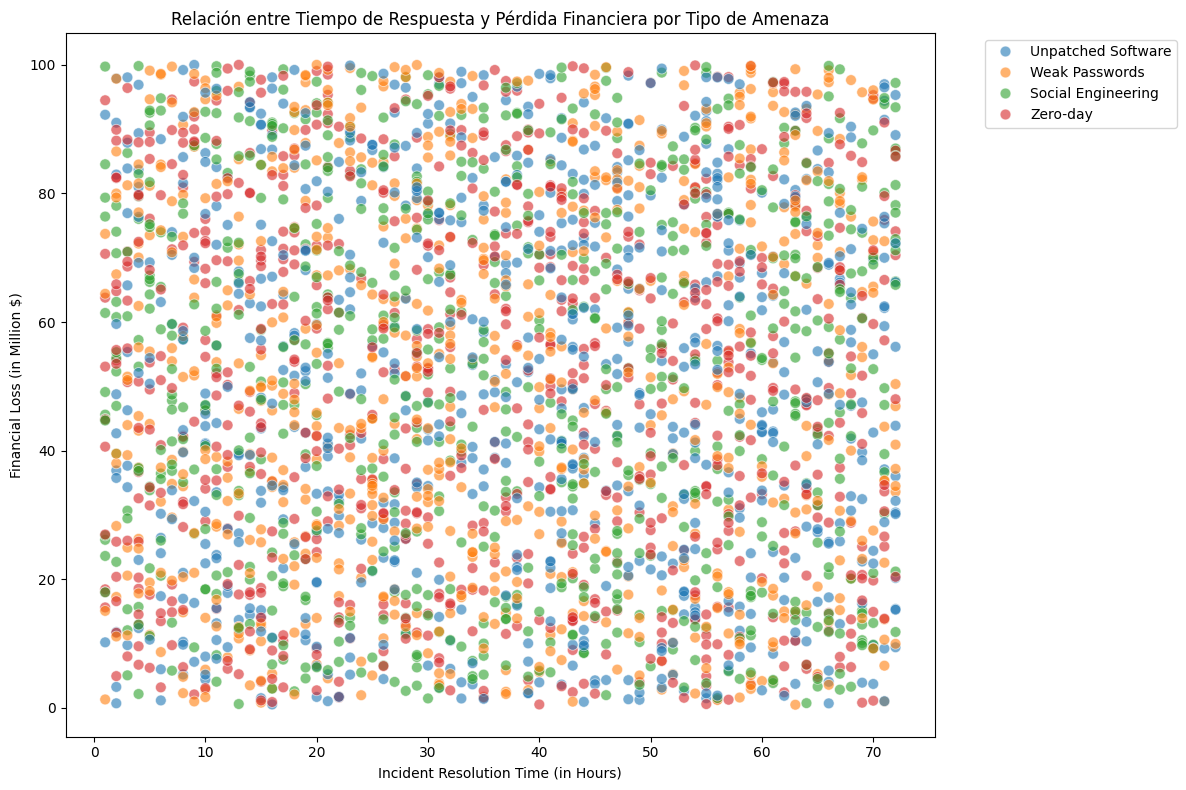

In [27]:
# Buscar interacciones entre variables
print("=== ANÁLISIS DE INTERACCIONES ===")

# Ejemplo: ¿El tiempo de respuesta afecta diferentemente según el tipo de amenaza?
interaction_analysis = df.groupby('Security Vulnerability Type').agg({
    'Financial Loss (in Million $)': 'mean',
    'Incident Resolution Time (in Hours)': 'mean'
}).sort_values('Financial Loss (in Million $)', ascending=False)

print("Interacción Tipo de Amenaza vs Tiempo de Respuesta:")
print(interaction_analysis.head(10))

# Visualizar interacciones
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)', 
                hue='Security Vulnerability Type', alpha=0.6, s=60)
plt.title('Relación entre Tiempo de Respuesta y Pérdida Financiera por Tipo de Amenaza')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Casos de alto impacto

In [28]:
# Identificar qué causa los valores extremos de pérdida
high_impact_threshold = df['Financial Loss (in Million $)'].quantile(0.95)
high_impact_cases = df[df['Financial Loss (in Million $)'] >= high_impact_threshold]

print(f"Casos de alto impacto (top 5%): {len(high_impact_cases)} incidentes")
print("\nCaracterísticas de casos de alto impacto:")
print(f"- Tipos de amenaza: {high_impact_cases['Security Vulnerability Type'].value_counts().head(3).to_dict()}")
print(f"- Industrias: {high_impact_cases['Target Industry'].value_counts().head(3).to_dict()}")
print(f"- Vectores: {high_impact_cases['Attack Source'].value_counts().head(3).to_dict()}")

Casos de alto impacto (top 5%): 150 incidentes

Características de casos de alto impacto:
- Tipos de amenaza: {'Weak Passwords': 50, 'Zero-day': 35, 'Unpatched Software': 33}
- Industrias: {'Banking': 27, 'Education': 23, 'Government': 23}
- Vectores: {'Nation-state': 48, 'Insider': 43, 'Unknown': 36}


In [29]:
# Los casos del top 5% (150 incidentes) concentran probablemente
# una porción significativa del impacto financiero total
high_impact_avg_loss = df.nlargest(150, 'Financial Loss (in Million $)')['Financial Loss (in Million $)'].mean()
print(f"Pérdida promedio en top 5%: ${high_impact_avg_loss:.2f}M")

Pérdida promedio en top 5%: $97.79M


In [31]:
categorical_columns = ['Country','Attack Type','Target Industry','Attack Source','Security Vulnerability Type','Defense Mechanism Used']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Correlaciones entre variables numericas

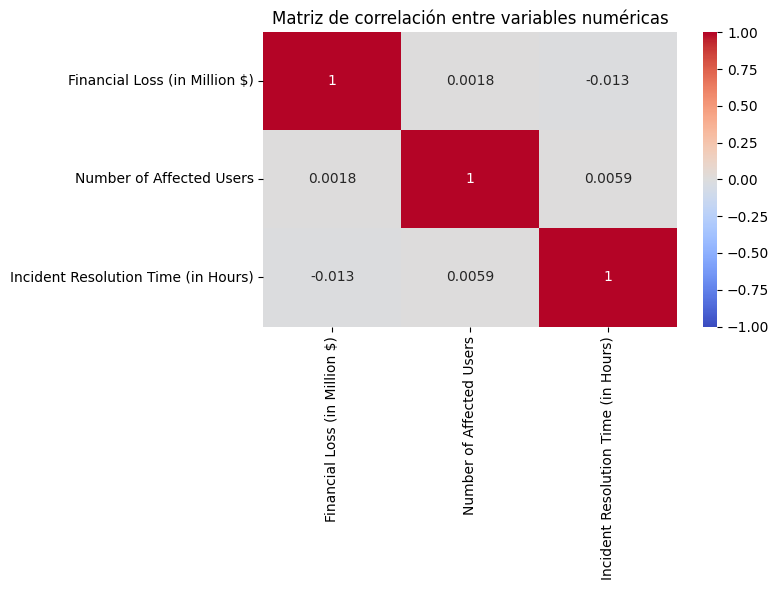

In [34]:
correlation_matrix = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].corr()

# Plot: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

# Correlaciones entre columas categoricas.

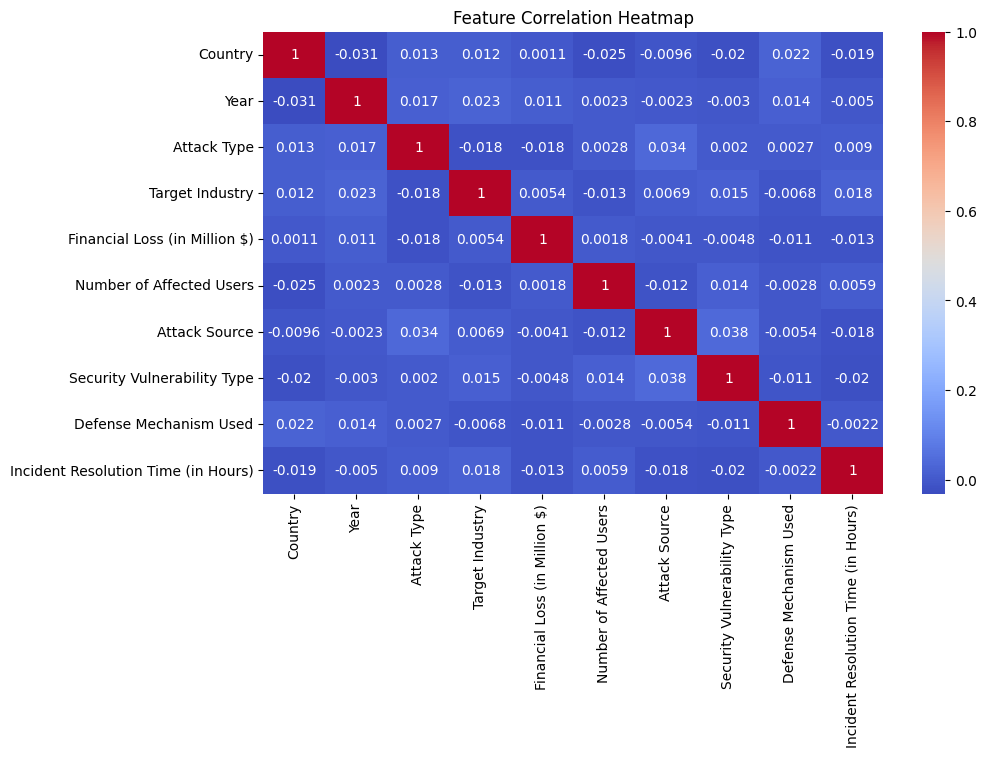

In [32]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()